![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/55025843-7d99a280-4fe0-11e9-938a-4879d95c4130.png"
    style="width:150px; float: right; margin: 0 40px 40px 40px;"></img>

# Interactive Notebooks Tutorial

Welcome to Jupyter Notebook ☁️ Data Science environment. All your work, analysis and datasets organized in the same place 🙌.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Objective of this tutorial:

> **Help you get started with Notebooks.ai for Data Science and Python programming.**

_Need help? Create an [issue](https://github.com/notebooks-ai/notebooks-help)._

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Jupyter Notebooks

This document that you're currently reading is a "Jupyter Notebook", and you've probably heard about it before. It's like a text document, but you can run code on it! It can also display inline graphs, pull data from Databases or show excel spreadsheets live! Isn't it amazing? 😄 

**Mildly interesting fact of the day:**

> _Jupyter is a nod to 3 languages: Julia, Python, and R._ Source [@jakevdp](https://twitter.com/jakevdp/status/1033071052652302336).

This is a really quick tutorial on how to get started with Jupyter notebooks (and lab). It shouldn't take more than 10 minutes and you'll be writing Python code right away.

### Part 1: everything is a _cell_

Jupyter Notebooks are organized as a set of _"cells"_. Each cell can contain different types of content: like Python code (or R, Julia, etc), images or even human readable text (markdown), like the one you're currently reading.

I've left a couple of empty cells below for you to see them:

This is another cell containing Markdown (human readable) code. And below, another empty cell:

You can edit these cells just by double clicking on them. Try editing the following cell:

**👉 Double click on me 👈**

When you double click the cell, it should open an "edit mode", and you should see something similar to:

![image](images/_1.png)

If you're seeing those asterisks, it's because you've correctly entered "Edit Mode". Once you've made the changes, you have to "execute", or "run" the cell to reflect the changes. To do that just click on the little _play_ button on the top menu bar:

![image](images/_2.png)

Jupyter notebooks are optimized for an efficient workflow. There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes; mastering these shortcuts will speed up your work. For example, there are two shortcuts to execute a cell:

1. `shift + return`: Run cell and advance to the next one.
2. `ctrl  + return`: Run the cell but don't change focus.


Try them with the following cell:

In [ ]:
2 + 2

You can try executing these cells as many times as you want, it won't break anything

#### `ctrl + Return` effect:

As you can see in the following animation, the code is correctly executed (it returns 4) and the focus (the blue line at the left side of the cell) stays in the same cell.

![ctrl+enter effect](images/_3.gif)

Now compare it to the next shortcut, `shift + return`:

#### `shift + Return` effect:

![shift+enter effect](images/_4.gif)

As you can see, every time I execute code the focus changes to the cell below.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 2: Working with code

Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple `2 + 2` before, so let's do something a little bit more interesting. First, we need to import `numpy` and `matplotlib`:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Notebooks.ai include all the most popular Data Science and Deep Learning libraries already installed. And even if there's one missing, you can always install it in your own environment (more on that later). We've just imported these two libraries:
* `numpy` the most popular Python library for array manipulation and numeric computing
* `matplotlib` the most popular visualization library in the Python ecosystem.

Let's now execute a few lines of code and generate some plots:

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

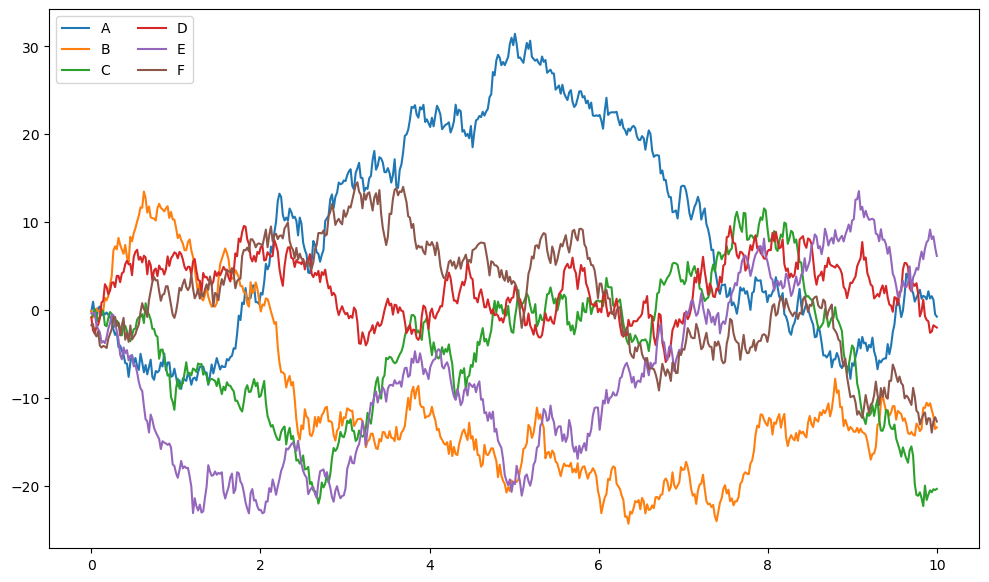

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

But what is that 😱? Just random generated datapoints, but you can clearly see how simple is to do numeric processing and plotting with Notebooks.ai.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 3: Interacting with data

Notebooks.ai and Jupyter Lab make it really simple to intereact with files in your local storage. These files are securely stored in the cloud and you can access them from anywhere in the world.

To show you the full potential of Notebooks.ai, we're going to pull cryptocurrencies prices from a public API and download them as Excel files, pretty fancy 😎. I need to import two libraries first: `requests` (to pull data from the web) and `pandas` to process it.

In [4]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from [Cryptowatch](https://cryptowat.ch) (for reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)).

In [26]:
import requests
import pandas as pd
from sqlalchemy import create_engine

def extract()-> dict:
    """ This API extracts data from
    http://universities.hipolabs.com
    """
    API_URL = "http://universities.hipolabs.com/search?country=Nigeria"
    data = requests.get(API_URL).json()
    return data

def transform(data:dict) -> pd.DataFrame:
    """ Transforms the dataset into desired structure and filters"""
    df = pd.DataFrame(data)
    print(f"Total Number of universities from API {len(data)}")
    print(f"Number of universities in Nigeria {len(df)}")
    df['domains'] = [','.join(map(str, l)) for l in df['domains']]
    df['web_pages'] = [','.join(map(str, l)) for l in df['web_pages']]
    df = df.reset_index(drop=True)
    return df[["domains","country","web_pages","name"]]

def load(df:pd.DataFrame)-> None:
    """ Loads data into a sqllite database"""
    disk_engine = create_engine('sqlite:///my_lite_store.db')
    df.to_sql('cal_uni', disk_engine, if_exists='replace')


data = extract()
df = transform(data)
load(df)

Total Number of universities from API 115
Number of universities in california 115


I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [27]:
df.head()

,domains,country,web_pages,name
0,aaua.edu.ng,Nigeria,http://www.aaua.edu.ng/,Adekunle Ajasin University
1,aauekpoma.edu.ng,Nigeria,http://www.aauekpoma.edu.ng/,Ambrose Alli University
2,abiapoly.edu.ng,Nigeria,http://www.abiapoly.edu.ng/,Abia State Polytechnic
3,absu.edu.ng,Nigeria,http://www.absu.edu.ng/,Abia State University
4,abuad.edu.ng,Nigeria,http://www.abuad.edu.ng/,Afe Babalola University


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 4: Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the `pandas` package:

In [35]:
writer = pd.ExcelWriter('universities.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [36]:
df.to_excel(writer, sheet_name='Nigeria')

And finally, we can save the file:

## Final words and how to get help

That's it! It's your time now to start working and playing around with jupyter lab and Notebooks.ai. This product is in an early stage, so we'd love to receive all your feedback and suggestions. If you need help or ideas for us to implement, create an issue in the following replo: [https://github.com/notebooks-ai/notebooks-help](https://github.com/notebooks-ai/notebooks-help). It'll be highly appreciated!

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [37]:
writer.save()

/var/folders/8h/bh158cv93ts8ys60ydvd7x980000gn/T/ipykernel_38729/934276808.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [1]:
#Robust Calculator

def convert_to_number(value):
    """Convert a value to a number (int or float)."""
    if isinstance(value, (int, float)):
        return value
    
    try:
        if '.' in str(value):
            return float(value)
        else:
            return int(value)
    except:
        raise ValueError(f"'{value}' is not a valid number")


def calculate(num1, operator, num2):
    """Perform calculation with two numbers and an operator."""
    try:
        first = convert_to_number(num1)
        second = convert_to_number(num2)
    except ValueError as error:
        return f"Error: {error}"
    
    if operator == '+':
        result = first + second
    elif operator == '-':
        result = first - second
    elif operator == '*':
        result = first * second
    elif operator == '/':
        if second == 0:
            return "Error: Cannot divide by zero"
        result = first / second
    else:
        return f"Error: '{operator}' is not a valid operator"
    
    return result


def evaluate_expression(expression):
    """Evaluate an expression like '12.5 * 3'."""
    parts = expression.split()
    
    if len(parts) != 3:
        return "Error: Expression must be like 'number operator number'"
    
    num1 = parts[0]
    operator = parts[1]
    num2 = parts[2]
    
    return calculate(num1, operator, num2)

print("\n--- Test 1: Basic Operations ---")
print(f"5 + 3 = {calculate(5, '+', 3)}")
print(f"10 - 4 = {calculate(10, '-', 4)}")
print(f"6 * 7 = {calculate(6, '*', 7)}")
print(f"20 / 4 = {calculate(20, '/', 4)}")


--- Test 1: Basic Operations ---
5 + 3 = 8
10 - 4 = 6
6 * 7 = 42
20 / 4 = 5.0


In [5]:
"""
Exercise 2: Student Records"""

students = []


def validate_field(field, value):
    """Validate individual fields dynamically."""
    rules = {
        'name': lambda v: isinstance(v, str) and v.strip(),
        'age': lambda v: 0 <= int(v) <= 150,
        'gpa': lambda v: 0.0 <= float(v) <= 4.0
    }
    
    try:
        return rules[field](value)
    except:
        return False


def add_student(name, age, gpa):
    """Add a new student with validation."""
    # Validate all fields
    if not validate_field('name', name):
        return "Error: Invalid name"
    if not validate_field('age', age):
        return "Error: Age must be 0-150"
    if not validate_field('gpa', gpa):
        return "Error: GPA must be 0.0-4.0"
    
    # Create and add student
    student_id = students[-1]['id'] + 1 if students else 1
    students.append({
        'id': student_id,
        'name': name,
        'age': int(age),
        'gpa': float(gpa)
    })
    return f"Added student ID: {student_id}"


def find_student(student_id):
    """Find student by ID, return (index, student) or (None, None)."""
    try:
        student_id = int(student_id)
        for i, s in enumerate(students):
            if s['id'] == student_id:
                return i, s
    except:
        pass
    return None, None


def view_student(student_id):
    """View student by ID."""
    _, student = find_student(student_id)
    return student if student else f"Error: Student {student_id} not found"


def update_student(student_id, **kwargs):
    """Update student fields dynamically."""
    idx, student = find_student(student_id)
    if not student:
        return f"Error: Student {student_id} not found"
    
    # Update each provided field
    for field, value in kwargs.items():
        if field in ['name', 'age', 'gpa']:
            if not validate_field(field, value):
                return f"Error: Invalid {field}"
            student[field] = type(student[field])(value)
    
    return f"Updated student {student_id}"


def delete_student(student_id):
    """Delete student by ID."""
    idx, student = find_student(student_id)
    if student:
        students.pop(idx)
        return f"Deleted student {student_id}"
    return f"Error: Student {student_id} not found"


def list_all_students():
    """Display all students."""
    if not students:
        return "No students in system"
    
    result = "\n" + "="*60 + "\nALL STUDENTS\n" + "="*60 + "\n"
    for s in students:
        result += f"ID: {s['id']} | {s['name']:20} | Age: {s['age']:3} | GPA: {s['gpa']:.2f}\n"
    return result + "="*60


# ============================================================
# TESTING
# ============================================================

print("="*60)
print("EXERCISE 2: STUDENT RECORDS - CRUD SYSTEM")
print("="*60)

# Add students
print("\n--- Adding Students ---")
print(add_student("Tony Shehu", 20, 3.8))
print(add_student("Bolaji Oladapo", 22, 3.5))
print(add_student("Umar Ibrahim", 19, 3.9))
print(add_student("Asmau Abdulkareem", 21, 4.0))

# List all
print(list_all_students())

EXERCISE 2: STUDENT RECORDS - CRUD SYSTEM

--- Adding Students ---
Added student ID: 1
Added student ID: 2
Added student ID: 3
Added student ID: 4

ALL STUDENTS
ID: 1 | Tony Shehu           | Age:  20 | GPA: 3.80
ID: 2 | Bolaji Oladapo       | Age:  22 | GPA: 3.50
ID: 3 | Umar Ibrahim         | Age:  19 | GPA: 3.90
ID: 4 | Asmau Abdulkareem    | Age:  21 | GPA: 4.00


In [15]:

"""
Exercise 3: Nested Grading Logic
Compute weighted grades and generate class statistics
"""

def calculate_weighted_grade(homework, midterm, final):
    """Calculate weighted total: homework 30%, midterm 30%, final 40%."""
    return (homework * 0.30) + (midterm * 0.30) + (final * 0.40)


def assign_letter_grade(score):
    """Assign letter grade with +/- tiers."""
    if score >= 97:
        return 'A+'
    elif score >= 93:
        return 'A'
    elif score >= 90:
        return 'A-'
    elif score >= 87:
        return 'B+'
    elif score >= 83:
        return 'B'
    elif score >= 80:
        return 'B-'
    elif score >= 77:
        return 'C+'
    elif score >= 73:
        return 'C'
    elif score >= 70:
        return 'C-'
    elif score >= 67:
        return 'D+'
    elif score >= 63:
        return 'D'
    elif score >= 60:
        return 'D-'
    else:
        return 'F'


def calculate_statistics(scores):
    """Calculate mean and median from a list of scores."""
    mean = sum(scores) / len(scores)
    
    sorted_scores = sorted(scores)
    n = len(sorted_scores)
    median = (sorted_scores[n//2 - 1] + sorted_scores[n//2]) / 2 if n % 2 == 0 else sorted_scores[n//2]
    
    return mean, median


def generate_class_report(student_data):
    """Generate comprehensive class grading report."""
    weighted_scores = []
    grade_counts = {}
    
    # Process each student
    for student in student_data:
        weighted = calculate_weighted_grade(
            student['homework'],
            student['midterm'],
            student['final']
        )
        grade = assign_letter_grade(weighted)
        
        student['weighted_score'] = weighted
        student['grade'] = grade
        weighted_scores.append(weighted)
        
        # Count grade distribution
        grade_counts[grade] = grade_counts.get(grade, 0) + 1
    
    # Calculate statistics
    mean, median = calculate_statistics(weighted_scores)
    
    # Build report
    report = "\n" + "="*70 + "\n"
    report += "CLASS GRADING REPORT\n"
    report += "="*70 + "\n\n"
    
    # Individual grades
    report += "INDIVIDUAL STUDENT GRADES:\n"
    report += "-"*70 + "\n"
    for s in student_data:
        report += f"{s['name']:25} | Score: {s['weighted_score']:6.2f} | Grade: {s['grade']}\n"
    
    # Statistics
    report += "\n" + "="*70 + "\n"
    report += "CLASS STATISTICS:\n"
    report += "="*70 + "\n"
    report += f"Mean Score:      {mean:.2f}\n"
    report += f"Median Score:    {median:.2f}\n"
    report += f"Total Students:  {len(student_data)}\n"
    
    # Grade distribution
    report += "\nGRADE DISTRIBUTION:\n"
    report += "-"*70 + "\n"
    for grade in sorted(grade_counts.keys()):
        count = grade_counts[grade]
        percentage = (count / len(student_data)) * 100
        bar = '█' * int(percentage / 2)
        report += f"{grade:3} | {count:2} students ({percentage:5.1f}%) {bar}\n"
    
    report += "="*70
    return report


# ============================================================
# TESTING
# ============================================================

print("="*70)
print("EXERCISE 3: NESTED GRADING LOGIC")
print("="*70)

# Sample student data
students = [
    {'name': 'Simnom Jacob', 'homework': 95, 'midterm': 88, 'final': 92},
    {'name': 'Don Smart', 'homework': 78, 'midterm': 82, 'final': 85},
    {'name': 'Saadatu Jumare', 'homework': 92, 'midterm': 95, 'final': 98},
    {'name': 'James Joseph', 'homework': 88, 'midterm': 90, 'final': 87},
    {'name': 'Cristiano Ronaldo', 'homework': 65, 'midterm': 70, 'final': 68},
    {'name': 'Killian Mbappe', 'homework': 85, 'midterm': 83, 'final': 88},
    {'name': 'Bruno Fernandes', 'homework': 98, 'midterm': 96, 'final': 99},
    {'name': 'Aman Bain', 'homework': 72, 'midterm': 75, 'final': 70},
    {'name': 'Janelle Benjamin', 'homework': 90, 'midterm': 92, 'final': 94},
    {'name': 'Jason Benjamin', 'homework': 55, 'midterm': 60, 'final': 58},
]

# Generate and print report
report = generate_class_report(students)
print(report)

# Test individual functions
print("\n\n--- Testing Individual Functions ---")
print(f"Weighted grade (HW:85, Mid:90, Final:88): {calculate_weighted_grade(85, 90, 88):.2f}")
print(f"Letter grade for 95: {assign_letter_grade(95)}")
print(f"Letter grade for 87: {assign_letter_grade(87)}")
print(f"Letter grade for 73: {assign_letter_grade(73)}")

test_scores = [85, 90, 78, 92, 88]
mean, median = calculate_statistics(test_scores)
print(f"\nStatistics for {test_scores}:")
print(f"Mean: {mean:.2f}, Median: {median:.2f}")

print("\n" + "="*70)
print("TESTS COMPLETED!")
print("="*70)

EXERCISE 3: NESTED GRADING LOGIC

CLASS GRADING REPORT

INDIVIDUAL STUDENT GRADES:
----------------------------------------------------------------------
Simnom Jacob              | Score:  91.70 | Grade: A-
Don Smart                 | Score:  82.00 | Grade: B-
Saadatu Jumare            | Score:  95.30 | Grade: A
James Joseph              | Score:  88.20 | Grade: B+
Cristiano Ronaldo         | Score:  67.70 | Grade: D+
Killian Mbappe            | Score:  85.60 | Grade: B
Bruno Fernandes           | Score:  97.80 | Grade: A+
Aman Bain                 | Score:  72.10 | Grade: C-
Janelle Benjamin          | Score:  92.20 | Grade: A-
Jason Benjamin            | Score:  57.70 | Grade: F

CLASS STATISTICS:
Mean Score:      83.03
Median Score:    86.90
Total Students:  10

GRADE DISTRIBUTION:
----------------------------------------------------------------------
A   |  1 students ( 10.0%) █████
A+  |  1 students ( 10.0%) █████
A-  |  2 students ( 20.0%) ██████████
B   |  1 students ( 10.0%) █

In [17]:
"""
Exercise 4: Contact Search & Deduplication
Search contacts and remove duplicates by phone/email
"""

import csv


def load_contacts(contact_list):
    """Load contacts from a list of dictionaries."""
    return contact_list.copy()


def search_contacts(contacts, search_term):
    """Search contacts by name, phone, or email (case-insensitive)."""
    search_term = search_term.lower()
    results = []
    
    for contact in contacts:
        name_match = search_term in contact.get('name', '').lower()
        phone_match = search_term in contact.get('phone', '').lower()
        email_match = search_term in contact.get('email', '').lower()
        
        if name_match or phone_match or email_match:
            results.append(contact)
    
    return results


def deduplicate_contacts(contacts):
    """Remove duplicates based on phone or email."""
    seen_phones = set()
    seen_emails = set()
    cleaned = []
    duplicates = []
    
    for contact in contacts:
        phone = contact.get('phone', '').strip()
        email = contact.get('email', '').strip().lower()
        
        is_duplicate = False
        reasons = []
        
        if phone and phone in seen_phones:
            is_duplicate = True
            reasons.append(f"phone: {phone}")
        
        if email and email in seen_emails:
            is_duplicate = True
            reasons.append(f"email: {email}")
        
        if is_duplicate:
            duplicates.append({
                'contact': contact,
                'reason': ', '.join(reasons)
            })
        else:
            cleaned.append(contact)
            if phone:
                seen_phones.add(phone)
            if email:
                seen_emails.add(email)
    
    return cleaned, duplicates


def save_to_csv(contacts, filename):
    """Save contacts to CSV file."""
    if not contacts:
        print("No contacts to save")
        return
    
    with open(filename, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=['name', 'phone', 'email'])
        writer.writeheader()
        writer.writerows(contacts)
    
    print(f"Saved {len(contacts)} contacts to {filename}")


def generate_duplicate_log(duplicates):
    """Generate log of removed duplicates."""
    if not duplicates:
        return "No duplicates found"
    
    log = "\n" + "="*60 + "\n"
    log += f"DEDUPLICATION LOG - {len(duplicates)} duplicates removed\n"
    log += "="*60 + "\n"
    
    for i, dup in enumerate(duplicates, 1):
        c = dup['contact']
        log += f"\n{i}. {c.get('name', 'Unknown')}\n"
        log += f"   Phone: {c.get('phone', 'N/A')}\n"
        log += f"   Email: {c.get('email', 'N/A')}\n"
        log += f"   Reason: Duplicate {dup['reason']}\n"
    
    log += "="*60
    return log


# ============================================================
# TESTING
# ============================================================

print("="*60)
print("EXERCISE 4: CONTACT SEARCH & DEDUPLICATION")
print("="*60)

# Sample contact data with duplicates
contacts = [
    {'name': 'Dorcas Moses', 'phone': '9034-5567', 'email': 'john@example.com'},
    {'name': 'Swachet Tukura', 'phone': '555-5678', 'email': 'jane@example.com'},
    {'name': 'Nufi Jaman', 'phone': '555-1234', 'email': 'john.doe@example.com'},
    {'name': 'Bethsheba Solomon', 'phone': '555-9999', 'email': 'bob@example.com'},
    {'name': 'Suzan Stephen', 'phone': '555-5678', 'email': 'alice@example.com'},
    {'name': 'Stephanie Maza', 'phone': '555-1111', 'email': 'charlie@example.com'},
    {'name': 'Peace Peter', 'phone': '555-2222', 'email': 'jane@example.com'},
    {'name': 'Shunom Andrew', 'phone': '555-3333', 'email': 'eve@example.com'},
]

print(f"\nTotal contacts loaded: {len(contacts)}")

# Test 1: Search functionality
print("\n--- Test 1: Search for 'John' ---")
results = search_contacts(contacts, 'John')
print(f"Found {len(results)} matches:")
for contact in results:
    print(f"  - {contact['name']}: {contact['phone']}, {contact['email']}")

print("\n--- Test 2: Search for '555-5678' ---")
results = search_contacts(contacts, '555-5678')
print(f"Found {len(results)} matches:")
for contact in results:
    print(f"  - {contact['name']}: {contact['phone']}, {contact['email']}")

print("\n--- Test 3: Search for 'example.com' ---")
results = search_contacts(contacts, 'example.com')
print(f"Found {len(results)} matches (showing first 3):")
for contact in results[:3]:
    print(f"  - {contact['name']}: {contact['email']}")

# Test 4: Deduplication
print("\n--- Test 4: Deduplication ---")
cleaned, duplicates = deduplicate_contacts(contacts)

print(f"\nOriginal contacts: {len(contacts)}")
print(f"Cleaned contacts:  {len(cleaned)}")
print(f"Duplicates found:  {len(duplicates)}")

# Display cleaned contacts
print("\n--- Cleaned Contact List ---")
for i, contact in enumerate(cleaned, 1):
    print(f"{i}. {contact['name']:20} | {contact['phone']:12} | {contact['email']}")

# Display duplicate log
print(generate_duplicate_log(duplicates))

# Test 5: Save to CSV
print("\n--- Test 5: Save to CSV ---")
save_to_csv(cleaned, 'cleaned_contacts.csv')

# Test 6: Case-insensitive search
print("\n--- Test 6: Case-Insensitive Search ---")
results = search_contacts(contacts, 'ALICE')
print(f"Search for 'ALICE': {len(results)} match(es)")
for contact in results:
    print(f"  - {contact['name']}")

print("\n" + "="*60)
print("TESTS COMPLETED!")
print("="*60)

EXERCISE 4: CONTACT SEARCH & DEDUPLICATION

Total contacts loaded: 8

--- Test 1: Search for 'John' ---
Found 2 matches:
  - Dorcas Moses: 9034-5567, john@example.com
  - Nufi Jaman: 555-1234, john.doe@example.com

--- Test 2: Search for '555-5678' ---
Found 2 matches:
  - Swachet Tukura: 555-5678, jane@example.com
  - Suzan Stephen: 555-5678, alice@example.com

--- Test 3: Search for 'example.com' ---
Found 8 matches (showing first 3):
  - Dorcas Moses: john@example.com
  - Swachet Tukura: jane@example.com
  - Nufi Jaman: john.doe@example.com

--- Test 4: Deduplication ---

Original contacts: 8
Cleaned contacts:  6
Duplicates found:  2

--- Cleaned Contact List ---
1. Dorcas Moses         | 9034-5567    | john@example.com
2. Swachet Tukura       | 555-5678     | jane@example.com
3. Nufi Jaman           | 555-1234     | john.doe@example.com
4. Bethsheba Solomon    | 555-9999     | bob@example.com
5. Stephanie Maza       | 555-1111     | charlie@example.com
6. Shunom Andrew        | 555

In [19]:
Exercise 5: Loop Practice - Prime Gap Finder
Find all pairs of consecutive primes with gaps >= 20 up to 10,000
"""

def is_prime(n):
    """Check if a number is prime."""
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    
    # Check odd divisors up to square root
    i = 3
    while i * i <= n:
        if n % i == 0:
            return False
        i += 2
    
    return True


def find_primes(limit):
    """Find all prime numbers up to limit."""
    primes = []
    for num in range(2, limit + 1):
        if is_prime(num):
            primes.append(num)
    return primes


def find_prime_gaps(limit, min_gap):
    """Find consecutive primes with gaps >= min_gap."""
    primes = find_primes(limit)
    gaps = []
    
    # Compare consecutive primes
    for i in range(len(primes) - 1):
        gap = primes[i + 1] - primes[i]
        if gap >= min_gap:
            gaps.append((primes[i], primes[i + 1], gap))
    
    return gaps


def save_gaps_to_file(gaps, filename):
    """Save prime gaps to a text file."""
    with open(filename, 'w') as f:
        f.write("Prime1,Prime2,Gap\n")
        for prime1, prime2, gap in gaps:
            f.write(f"{prime1},{prime2},{gap}\n")
    
    print(f"Saved {len(gaps)} prime gaps to {filename}")


SyntaxError: unterminated triple-quoted string literal (detected at line 54) (3503032982.py, line 48)

In [20]:
"""
Exercise 5: Loop Practice - Prime Gap Finder
Find all pairs of consecutive primes with gaps >= 20 up to 10,000
"""

def is_prime(n):
    """Check if a number is prime."""
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    
    # Check odd divisors up to square root
    i = 3
    while i * i <= n:
        if n % i == 0:
            return False
        i += 2
    
    return True


def find_primes(limit):
    """Find all prime numbers up to limit."""
    primes = []
    for num in range(2, limit + 1):
        if is_prime(num):
            primes.append(num)
    return primes


def find_prime_gaps(limit, min_gap):
    """Find consecutive primes with gaps >= min_gap."""
    primes = find_primes(limit)
    gaps = []
    
    # Compare consecutive primes
    for i in range(len(primes) - 1):
        gap = primes[i + 1] - primes[i]
        if gap >= min_gap:
            gaps.append((primes[i], primes[i + 1], gap))
    
    return gaps


def save_gaps_to_file(gaps, filename):
    """Save prime gaps to a text file."""
    with open(filename, 'w') as f:
        f.write("Prime1,Prime2,Gap\n")
        for prime1, prime2, gap in gaps:
            f.write(f"{prime1},{prime2},{gap}\n")
    
    print(f"Saved {len(gaps)} prime gaps to {filename}")


# ============================================================
# TESTING
# ============================================================

print("="*60)
print("EXERCISE 5: PRIME GAP FINDER")
print("="*60)

# Test 1: Check is_prime function
print("\n--- Test 1: Prime Number Checker ---")
test_numbers = [2, 3, 4, 5, 10, 17, 20, 29, 100]
for num in test_numbers:
    print(f"{num} is prime: {is_prime(num)}")

# Test 2: Find primes up to 50
print("\n--- Test 2: Primes up to 50 ---")
primes_50 = find_primes(50)
print(f"Found {len(primes_50)} primes: {primes_50}")

# Test 3: Find prime gaps >= 20 up to 10,000
print("\n--- Test 3: Finding Prime Gaps >= 20 up to 10,000 ---")
print("This may take a few seconds...")
gaps = find_prime_gaps(10000, 20)

print(f"\nFound {len(gaps)} prime gaps >= 20")

# Display first 15 gaps
print("\nFirst 15 prime gaps:")
print("-" * 60)
print(f"{'No.':<5} {'Prime 1':<10} {'Prime 2':<10} {'Gap':<10}")
print("-" * 60)
for i, (p1, p2, gap) in enumerate(gaps[:15], 1):
    print(f"{i:<5} {p1:<10} {p2:<10} {gap:<10}")

# Display last 5 gaps
print("\nLast 5 prime gaps:")
print("-" * 60)
for i, (p1, p2, gap) in enumerate(gaps[-5:], len(gaps) - 4):
    print(f"{i:<5} {p1:<10} {p2:<10} {gap:<10}")

# Statistics
print("\n--- Gap Statistics ---")
gap_sizes = [gap for _, _, gap in gaps]
print(f"Smallest gap: {min(gap_sizes)}")
print(f"Largest gap:  {max(gap_sizes)}")
print(f"Average gap:  {sum(gap_sizes) / len(gap_sizes):.2f}")

# Test 4: Save to file
print("\n--- Test 4: Save to File ---")
save_gaps_to_file(gaps, 'prime_gaps.txt')

# Test 5: Different gap sizes
print("\n--- Test 5: Gaps of Different Sizes (up to 1000) ---")
for gap_size in [10, 14, 18]:
    gaps_test = find_prime_gaps(1000, gap_size)
    print(f"Gaps >= {gap_size}: {len(gaps_test)} found")

print("\n" + "="*60)
print("TESTS COMPLETED!")
print("="*60)

EXERCISE 5: PRIME GAP FINDER

--- Test 1: Prime Number Checker ---
2 is prime: True
3 is prime: True
4 is prime: False
5 is prime: True
10 is prime: False
17 is prime: True
20 is prime: False
29 is prime: True
100 is prime: False

--- Test 2: Primes up to 50 ---
Found 15 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

--- Test 3: Finding Prime Gaps >= 20 up to 10,000 ---
This may take a few seconds...

Found 69 prime gaps >= 20

First 15 prime gaps:
------------------------------------------------------------
No.   Prime 1    Prime 2    Gap       
------------------------------------------------------------
1     887        907        20        
2     1129       1151       22        
3     1327       1361       34        
4     1637       1657       20        
5     1669       1693       24        
6     1951       1973       22        
7     2179       2203       24        
8     2311       2333       22        
9     2477       2503       26        
10    2557      

In [21]:
"""
Exercise 6: BMI Logger with Unit Options
Log BMI entries with metric/imperial units and display trends
"""

import csv
from datetime import datetime


def convert_to_metric(weight, height, unit_system):
    """Convert weight and height to metric (kg and meters)."""
    if unit_system == 'metric':
        # Weight in kg, height in cm - convert cm to meters
        return weight, height / 100
    elif unit_system == 'imperial':
        # Weight in lbs, height in inches - convert to kg and meters
        weight_kg = weight * 0.453592
        height_m = height * 0.0254
        return weight_kg, height_m
    else:
        raise ValueError("Unit system must be 'metric' or 'imperial'")


def calculate_bmi(weight_kg, height_m):
    """Calculate BMI from weight (kg) and height (m)."""
    return weight_kg / (height_m ** 2)


def get_bmi_category(bmi):
    """Determine BMI category."""
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"


def log_bmi_entry(weight, height, unit_system, filename='bmi_log.csv'):
    """Log a BMI entry with timestamp to CSV."""
    try:
        weight = float(weight)
        height = float(height)
        
        if weight <= 0 or height <= 0:
            return "Error: Weight and height must be positive"
        
        # Convert to metric
        weight_kg, height_m = convert_to_metric(weight, height, unit_system)
        
        # Calculate BMI
        bmi = calculate_bmi(weight_kg, height_m)
        category = get_bmi_category(bmi)
        
        # Get timestamp
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        
        # Append to CSV
        with open(filename, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([timestamp, weight_kg, height_m, bmi, category])
        
        return f"✓ Logged: BMI = {bmi:.2f} ({category})"
        
    except ValueError:
        return "Error: Invalid input values"
    except Exception as e:
        return f"Error: {e}"


def display_last_entries(filename='bmi_log.csv', n=10):
    """Display last n BMI entries with ASCII trend bars."""
    try:
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            entries = list(reader)
        
        if not entries:
            return "No entries found in log"
        
        # Get last n entries
        last_entries = entries[-n:]
        
        output = "\n" + "="*70 + "\n"
        output += f"LAST {len(last_entries)} BMI ENTRIES\n"
        output += "="*70 + "\n"
        
        bmis = []
        for entry in last_entries:
            timestamp, weight, height, bmi, category = entry
            bmi_val = float(bmi)
            bmis.append(bmi_val)
            
            output += f"{timestamp} | BMI: {bmi_val:5.2f} | {category}\n"
        
        # Add ASCII trend bars
        output += "\n" + "="*70 + "\n"
        output += "BMI TREND VISUALIZATION\n"
        output += "="*70 + "\n"
        
        max_bmi = max(bmis) if bmis else 1
        for i, bmi_val in enumerate(bmis, 1):
            bar_length = int((bmi_val / max_bmi) * 50)
            bar = '█' * bar_length
            output += f"{i:2}. {bar} {bmi_val:.2f}\n"
        
        output += "="*70
        return output
        
    except FileNotFoundError:
        return f"Error: File '{filename}' not found"
    except Exception as e:
        return f"Error: {e}"


def clear_log(filename='bmi_log.csv'):
    """Clear the BMI log file."""
    try:
        with open(filename, 'w', newline='') as f:
            pass
        return f"Log file '{filename}' cleared"
    except Exception as e:
        return f"Error: {e}"


# ============================================================
# TESTING
# ============================================================

print("="*70)
print("EXERCISE 6: BMI LOGGER WITH UNIT OPTIONS")
print("="*70)

# Clear log for fresh demo
print("\n--- Initializing Log ---")
print(clear_log())

# Test 1: Metric entries (kg, cm)
print("\n--- Test 1: Logging Metric Entries ---")
print(log_bmi_entry(70, 175, 'metric'))    # Normal weight
print(log_bmi_entry(85, 180, 'metric'))    # Overweight
print(log_bmi_entry(55, 165, 'metric'))    # Underweight
print(log_bmi_entry(95, 170, 'metric'))    # Obese

# Test 2: Imperial entries (lbs, inches)
print("\n--- Test 2: Logging Imperial Entries ---")
print(log_bmi_entry(154, 69, 'imperial'))  # 70kg, 175cm equivalent
print(log_bmi_entry(180, 72, 'imperial'))  # Overweight
print(log_bmi_entry(130, 64, 'imperial'))  # Normal weight

# Test 3: More entries for trend
print("\n--- Test 3: Adding More Entries for Trend ---")
print(log_bmi_entry(72, 175, 'metric'))
print(log_bmi_entry(68, 175, 'metric'))
print(log_bmi_entry(75, 180, 'metric'))

# Test 4: Display entries
print(display_last_entries('bmi_log.csv', 10))

# Test 5: Input validation
print("\n--- Test 5: Input Validation ---")
print(log_bmi_entry(-70, 175, 'metric'))
print(log_bmi_entry(70, 0, 'metric'))
print(log_bmi_entry('abc', 175, 'metric'))

# Test 6: Unit conversion demonstration
print("\n--- Test 6: Unit Conversion Examples ---")
weight_kg, height_m = convert_to_metric(154, 69, 'imperial')
print(f"154 lbs, 69 inches = {weight_kg:.2f} kg, {height_m:.2f} m")

weight_kg, height_m = convert_to_metric(70, 175, 'metric')
print(f"70 kg, 175 cm = {weight_kg:.2f} kg, {height_m:.2f} m")

# Test 7: BMI categories
print("\n--- Test 7: BMI Category Examples ---")
test_bmis = [17.5, 22.0, 27.5, 32.0]
for bmi in test_bmis:
    print(f"BMI {bmi:.1f} → {get_bmi_category(bmi)}")

print("\n" + "="*70)
print("TESTS COMPLETED!")
print("="*70)

EXERCISE 6: BMI LOGGER WITH UNIT OPTIONS

--- Initializing Log ---
Log file 'bmi_log.csv' cleared

--- Test 1: Logging Metric Entries ---
✓ Logged: BMI = 22.86 (Normal weight)
✓ Logged: BMI = 26.23 (Overweight)
✓ Logged: BMI = 20.20 (Normal weight)
✓ Logged: BMI = 32.87 (Obese)

--- Test 2: Logging Imperial Entries ---
✓ Logged: BMI = 22.74 (Normal weight)
✓ Logged: BMI = 24.41 (Normal weight)
✓ Logged: BMI = 22.31 (Normal weight)

--- Test 3: Adding More Entries for Trend ---
✓ Logged: BMI = 23.51 (Normal weight)
✓ Logged: BMI = 22.20 (Normal weight)
✓ Logged: BMI = 23.15 (Normal weight)

LAST 10 BMI ENTRIES
2025-12-31 12:23:55 | BMI: 22.86 | Normal weight
2025-12-31 12:23:55 | BMI: 26.23 | Overweight
2025-12-31 12:23:55 | BMI: 20.20 | Normal weight
2025-12-31 12:23:55 | BMI: 32.87 | Obese
2025-12-31 12:23:55 | BMI: 22.74 | Normal weight
2025-12-31 12:23:55 | BMI: 24.41 | Normal weight
2025-12-31 12:23:55 | BMI: 22.31 | Normal weight
2025-12-31 12:23:55 | BMI: 23.51 | Normal weight
20

In [ ]:
number = None  # Initialize the variable

while number != 7:
    try:
        number = int(input('Enter the Number: '))
        if number == 7:
            print('You are Correct')
        else:
            print('Incorrect Answer')
    except ValueError:
        print("Please enter a valid number!")

Enter the Number:  6


Incorrect Answer


In [ ]:
"""
Exercise 7: Adaptive Guessing Game
Number guessing game with difficulty adjustment and high score tracking
"""

import random


def load_high_scores(filename='high_scores.txt'):
    """Load top 5 high scores from file."""
    try:
        with open(filename, 'r') as f:
            scores = []
            for line in f:
                if line.strip():
                    name, attempts = line.strip().split(',')
                    scores.append((name, int(attempts)))
            return scores
    except FileNotFoundError:
        return []


def save_high_scores(scores, filename='high_scores.txt'):
    """Save top 5 high scores to file."""
    # Sort by attempts (lower is better) and keep top 5
    scores = sorted(scores, key=lambda x: x[1])[:5]
    
    with open(filename, 'w') as f:
        for name, attempts in scores:
            f.write(f"{name},{attempts}\n")


def display_high_scores(scores):
    """Display high scores in a formatted table."""
    if not scores:
        return "No high scores yet!"
    
    output = "\n" + "="*50 + "\n"
    output += "🏆 TOP 5 HIGH SCORES 🏆\n"
    output += "="*50 + "\n"
    
    for i, (name, attempts) in enumerate(scores[:5], 1):
        medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
        output += f"{medal} {i}. {name:20} - {attempts} attempts\n"
    
    output += "="*50
    return output


def play_round(player_name, min_range=1, max_range=100):
    """Play one round of the guessing game."""
    target = random.randint(min_range, max_range)
    attempts = 0
    
    print(f"\n🎮 Guess a number between {min_range} and {max_range}")
    
    while True:
        try:
            guess = int(input("Your guess: "))
            attempts += 1
            
            if guess < min_range or guess > max_range:
                print(f"⚠️  Please guess between {min_range} and {max_range}")
                continue
            
            if guess == target:
                print(f"\n🎉 Correct! You guessed it in {attempts} attempts!")
                return attempts
            elif guess < target:
                print("📉 Too low! Try again.")
            else:
                print("📈 Too high! Try again.")
                
        except ValueError:
            print("❌ Please enter a valid number")


def play_game():
    """Main game loop with adaptive difficulty."""
    print("\n" + "="*50)
    print("🎮 ADAPTIVE GUESSING GAME 🎮")
    print("="*50)
    
    player_name = input("\nEnter your name: ").strip()
    if not player_name:
        player_name = "Player"
    
    # Load existing high scores
    high_scores = load_high_scores()
    
    # Game state
    min_range = 1
    max_range = 100
    streak = 0
    total_rounds = 0
    
    while True:
        total_rounds += 1
        print(f"\n{'='*50}")
        print(f"ROUND {total_rounds} | Current Range: {min_range}-{max_range}")
        if streak > 0:
            print(f"🔥 Win Streak: {streak}")
        print(f"{'='*50}")
        
        attempts = play_round(player_name, min_range, max_range)
        
        # Update streak
        streak += 1
        
        # Adjust difficulty based on streak
        if streak >= 2:
            max_range = min(max_range + 50, 1000)
            print(f"\n⬆️  Difficulty increased! New range: {min_range}-{max_range}")
        
        # Update high scores
        high_scores.append((player_name, attempts))
        save_high_scores(high_scores)
        
        # Display current high scores
        current_scores = load_high_scores()
        print(display_high_scores(current_scores))
        
        # Ask to play again
        play_again = input("\nPlay another round? (yes/no): ").lower()
        if play_again not in ['yes', 'y']:
            break
        
        # Reset streak if player chooses to continue
        reset = input("Reset difficulty? (yes/no): ").lower()
        if reset in ['yes', 'y']:
            min_range = 1
            max_range = 100
            streak = 0
    
    print("\n" + "="*50)
    print(f"Thanks for playing, {player_name}!")
    print(f"Total rounds played: {total_rounds}")
    print("="*50)


# ============================================================
# TESTING (Simulation Mode)
# ============================================================

def simulate_game_round(min_range, max_range, target):
    """Simulate a round for testing (binary search strategy)."""
    attempts = 0
    low, high = min_range, max_range
    
    while low <= high:
        attempts += 1
        guess = (low + high) // 2
        
        if guess == target:
            return attempts
        elif guess < target:
            low = guess + 1
        else:
            high = guess - 1
    
    return attempts


print("="*50)
print("EXERCISE 7: ADAPTIVE GUESSING GAME")
print("="*50)

# Clear high scores for demo
try:
    with open('high_scores.txt', 'w') as f:
        pass
    print("\n✓ High scores cleared for demo")
except:
    pass

# Test 1: Simulate some games
print("\n--- Test 1: Simulating Game Rounds ---")
test_ranges = [(1, 100), (1, 150), (1, 200)]
for min_r, max_r in test_ranges:
    target = random.randint(min_r, max_r)
    attempts = simulate_game_round(min_r, max_r, target)
    print(f"Range {min_r}-{max_r}, Target: {target}, Attempts: {attempts}")

# Test 2: Add sample high scores
print("\n--- Test 2: Creating Sample High Scores ---")
sample_scores = [
    ("Alice", 5),
    ("Bob", 8),
    ("Charlie", 6),
    ("Diana", 10),
    ("Eve", 7),
    ("Frank", 12),
]

save_high_scores(sample_scores)
loaded_scores = load_high_scores()
print(display_high_scores(loaded_scores))

# Test 3: Test difficulty progression
print("\n--- Test 3: Difficulty Progression Simulation ---")
print("Starting range: 1-100")
print("After 2 wins (streak = 2): 1-150")
print("After 4 wins (streak = 4): 1-200")
print("After 6 wins (streak = 6): 1-250")

# Instructions for playing
print("\n" + "="*50)
print("TO PLAY THE GAME:")
print("="*50)
print("Run the function: play_game()")
print("\nGame Features:")
print("- Starts with range 1-100")
print("- Win streak increases difficulty")
print("- Top 5 high scores saved")
print("- Track attempts per round")
print("="*50)

# Uncomment the line below to play the actual game
# play_game()